# Ghouls, Goblins, and Ghosts... Boo!
**____________________________________________________________**
Get out your dowsing rods, electromagnetic sensors, … and gradient boosting machines. Kaggle is haunted and we need your help. After a month of making scientific observations and taking careful measurements, we’ve determined that 900 ghouls, ghosts, and goblins are infesting our halls and frightening our data scientists. When trying garlic, asking politely, and using reverse psychology didn't work, it became clear that machine learning is the only answer to banishing our unwanted guests.

So now the hour has come to put the data we’ve collected in your hands. We’ve managed to identify 371 of the ghastly creatures, but need your help to vanquish the rest. And only an accurate classification algorithm can thwart them. Use bone length measurements, severity of rot, extent of soullessness, and other characteristics to distinguish (and extinguish) the intruders. Are you ghost-busters up for the challenge?

# Ghouls
<img src="Ghouls.png", width=200, height=200>

# Goblins
<img src="Goblins.jpg", width=200, height=200>

# Ghosts
<img src="Ghosts.png", width=200, height=200>

# Desarrollo de la competencia 

Las variables de la base de datos son las siguientes:

* bone_length: longitud promedio del hueso en la criatura, normalizada entre 0 y 1
* rotting_flesh - porcentaje de carne podrida en la criatura
* hair_length - longitud promedio del cabello, normalizada entre 0 y 1
* has_soul - porcentaje de alma en la criatura
* color (dominante de la criatura): 'blanco', 'negro', 'claro', 'azul', 'verde', 'sangre'
* tipo - (variable de interés): 'Fantasma', 'Duende' y 'Ghoul'

## Preparación de los datos

"Realizar procesos de limpieza que incluyen el tratamiento de Missing values y/o Outliers, manejo de
características categóricas"

* **Cargue de la base de Train** 

In [58]:
import pandas as pd
import zipfile
with zipfile.ZipFile('C:/Users/429331/Desktop/PERSONAL/MAESTRIA/21 DEEP LEARNING/PROYECTO NUEVO/Project/train.csv.zip', 'r') as z:
#with zipfile.ZipFile('C:/Users/AsusPC/Documents/Analytics/2018-Vacacional/DeepLearning/Project/train.csv.zip', 'r') as z:
    f = z.open('train.csv')
    train = pd.io.parsers.read_table(f, sep=',')
    
print("Tamaño de la base de Train")
print(train.shape)

Tamaño de la base de Train
(371, 7)


* **Visualización del data frame**

Se identifican las variables que tiene incluidas la base de Train:

In [59]:
train.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


* **Identificación de missing values**

In [60]:
train.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

Se evidencia que no hay missing values en la base de datos 

* **Manejo de las variables categóricas**

Se identifican las variables categoricas:

In [61]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


En el manejo de las variables categóricas, se decide ordenarlas, transformándolas en valores numéricos sensibles:

In [62]:
train.dtypes

id                 int64
bone_length      float64
rotting_flesh    float64
hair_length      float64
has_soul         float64
color             object
type              object
dtype: object

In [63]:
train['type'].value_counts()

Ghoul     129
Goblin    125
Ghost     117
Name: type, dtype: int64

In [64]:
train['type'] = train.type.map({'Ghoul':1, 'Goblin':2, 'Ghost':3})

In [65]:
train['color'].value_counts()

white    137
clear    120
green     42
black     41
blue      19
blood     12
Name: color, dtype: int64

In [66]:
train['color'] = train.color.map({'white':1, 'clear':2, 'green':3, 'black':4, 'blue':5, 'blood':6})

In [67]:
train.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
count,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392,2.247978,1.967655
std,263.222489,0.132833,0.146358,0.169902,0.176129,1.358841,0.814749
min,0.000000,0.061032,0.095687,0.134600,0.009402,1.000000,1.000000
25%,205.500000,0.340006,0.414812,0.407428,0.348002,1.000000,1.000000
50%,458.000000,0.434891,0.501552,0.538642,0.466372,2.000000,2.000000
75%,678.500000,0.517223,0.603977,0.647244,0.600610,3.000000,3.000000
max,897.000000,0.817001,0.932466,1.000000,0.935721,6.000000,3.000000


Se muestra las descriptivas de cada variable pero se debe tener encuenta que las descriptivas de las variables color y type no tienen sentido dado que estas son categóricas

In [68]:
train = train.drop('id', axis=1)

In [69]:
train.head()

,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0.354512,0.350839,0.465761,0.781142,2,1
1,0.575560,0.425868,0.531401,0.439899,3,2
2,0.467875,0.354330,0.811616,0.791225,4,1
3,0.776652,0.508723,0.636766,0.884464,4,1
4,0.566117,0.875862,0.418594,0.636438,3,3


* **Identificación de outliers**

Se grafica la variable “type” (tipo de monstruo) contra cada una de las otras variables, para identificar visualmente si existen outliers en cada variable. 

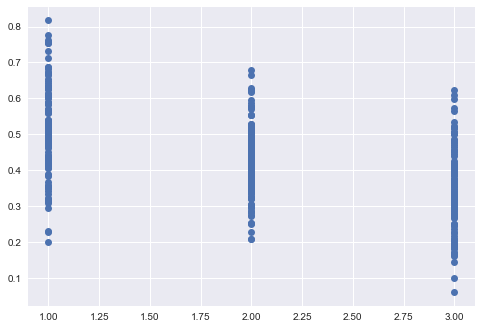

count    371.000000
mean       0.434160
std        0.132833
min        0.061032
25%        0.340006
50%        0.434891
75%        0.517223
max        0.817001
Name: bone_length, dtype: float64

In [70]:
import matplotlib.pyplot as plt 
x = train["type"] 
y = train["bone_length"]
plt.plot(x,y,'o')
plt.show()

train["bone_length"].describe()

Se evidencia que los “Ghoul” tienen una longitud promedio de huesos mayor que los otros dos monstruos, lo cual tiene sentido, si se compara con la imagen. 

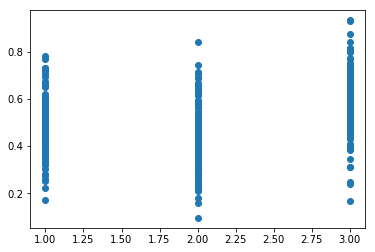

count    371.000000
mean       0.506848
std        0.146358
min        0.095687
25%        0.414812
50%        0.501552
75%        0.603977
max        0.932466
Name: rotting_flesh, dtype: float64

In [14]:
import matplotlib.pyplot as plt 
x = train["type"] 
y = train["rotting_flesh"]
plt.plot(x,y,'o')
plt.show()

train["rotting_flesh"].describe()

Se evidencia que los “Ghost” tienen un porcentaje más alto de Carne podrida que los otros dos monstruos.

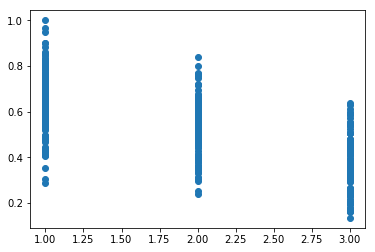

count    371.000000
mean       0.529114
std        0.169902
min        0.134600
25%        0.407428
50%        0.538642
75%        0.647244
max        1.000000
Name: hair_length, dtype: float64

In [15]:
import matplotlib.pyplot as plt 
x = train["type"] 
y = train["hair_length"]
plt.plot(x,y,'o')
plt.show()

train["hair_length"].describe()

Se evidencia que los “Ghoul” tienen una longitud promedio de pelo (normalizado) más largo que los otros dos monstruos.

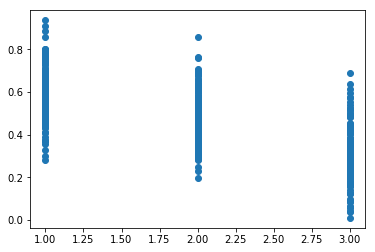

count    371.000000
mean       0.471392
std        0.176129
min        0.009402
25%        0.348002
50%        0.466372
75%        0.600610
max        0.935721
Name: has_soul, dtype: float64

In [16]:
import matplotlib.pyplot as plt 
x = train["type"] 
y = train["has_soul"]
plt.plot(x,y,'o')
plt.show()

train["has_soul"].describe()

Se evidencia que los “Ghoul” prsentan los porcentajes más altos de alma que los otros moustruos.

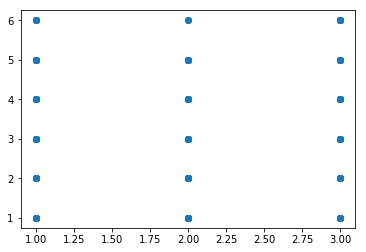

count    371.000000
mean       2.247978
std        1.358841
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: color, dtype: float64

In [17]:
import matplotlib.pyplot as plt 
x = train["type"] 
y = train["color"]
plt.plot(x,y,'o')
plt.show()

train["color"].describe()

Se evidencia que los monstruos pueden ser de cualquiera de los seis colores.

Luego se grafica una matriz de correlaciones, para identificar si existe correlación alta entre las variables independientes:

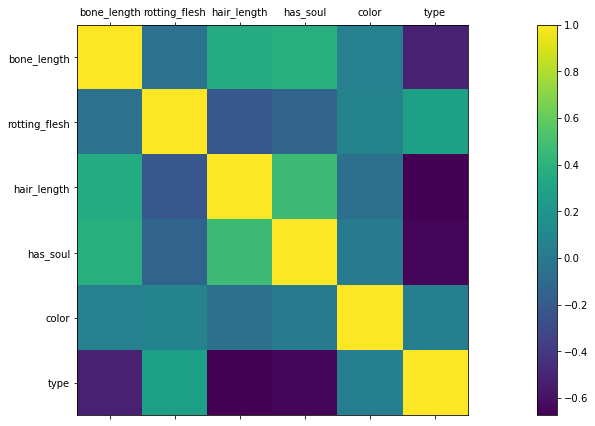

In [18]:
plt.figure(figsize=(25,7))
plt.matshow(train.corr(), fignum=1)
plt.xticks(range(len(train.columns)), train.columns)
plt.yticks(range(len(train.columns)), train.columns)
plt.colorbar()
plt.show()

Por último, de las gráficas y estadísticos anteriores se concluye que no hay outliers en ninguna de las variables, puesto que ninguna de las observaciones se aleja "considerablemente" de la media, además de que la mayoría de las variables se distribuyen entre 0 y 1. Tampoco se ve una correlación “alta” entre las variables independientes.

## Evaluación de modelos

"La evaluación, calibración y selección de diferentes modelos. Para esta etapa debe tener en cuenta los
procesos de Training Score, Validation Score, curva de validación y curva de aprendizaje."

* **Cargue de la base de Test** 

(Para realizar la predicción)

In [71]:
import pandas as pd
import zipfile
with zipfile.ZipFile('C:/Users/429331/Desktop/PERSONAL/MAESTRIA/21 DEEP LEARNING/PROYECTO NUEVO/Project/test.csv.zip', 'r') as z:
#with zipfile.ZipFile('C:/Users/AsusPC/Documents/Analytics/2018-Vacacional/DeepLearning/Project/test.csv.zip', 'r') as z:
    f = z.open('test.csv')
    test = pd.io.parsers.read_table(f, sep=',')
    
print("Tamaño de la base de Test")
print(test.shape)

Tamaño de la base de Test
(529, 6)


In [72]:
test['color'] = test.color.map({'white':1, 'clear':2, 'green':3, 'black':4, 'blue':5, 'blood':6})
test.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,4
1,6,0.427332,0.645024,0.565558,0.451462,1
2,9,0.549602,0.491931,0.660387,0.449809,4
3,10,0.638095,0.682867,0.471409,0.356924,1
4,13,0.361762,0.583997,0.377256,0.276364,4


## **<font color=red>Creación de un modelo de clasificación de Árboles:</font>**

La idea fundamental de un árbol de decisión es estratificar el espacio de predictores, es decir generar una partición y predecir de manera constante en cada parte resultante:

<img src="Arboles.PNG", width=300, height=300>

In [21]:
from sklearn import tree
import numpy as np
import pandas as pd
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'] )
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Después, se crea la predicción de la variable “type” sobre la base del Test:

In [22]:
pred = clf.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']] )
pred = pd.DataFrame(pred)
pred.columns = ['type']
pred = pred.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})

Y se crea el archivo de "Submission" numero 1:

In [23]:
Submission1 = test
Submission1['type'] = pred
Submission1 = Submission1.drop('bone_length', axis=1)
Submission1 = Submission1.drop('rotting_flesh', axis=1)
Submission1 = Submission1.drop('hair_length', axis=1)
Submission1 = Submission1.drop('has_soul', axis=1)
Submission1 = Submission1.drop('color', axis=1)
import pandas as pd
Submission1.to_csv('Submission1.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.64839

<img src="Submission1.png">

## **<font color=red>Creación de un modelo de clasificación de Random Forest:</font>**

El algoritmo de random forest es un meta estimador que estima un número de árboles de decisión con varias submuestras del conjunto de datos y los promedia para mejorar la precisión y el control del over-fitting. La submuestra siempre tiene el tamaño de la muestra original pero se seleccionan con bootstrap:

<img src="Random Forest.png", width=300, height=300>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [25]:
pred2 = rf.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']])
pred2 = pd.DataFrame(pred2)
pred2.columns = ['type']
pred2 = pred2.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})
Submission2 = test
Submission2['type'] = pred2
Submission2 = Submission2.drop('bone_length', axis=1)
Submission2 = Submission2.drop('rotting_flesh', axis=1)
Submission2 = Submission2.drop('hair_length', axis=1)
Submission2 = Submission2.drop('has_soul', axis=1)
Submission2 = Submission2.drop('color', axis=1)
import pandas as pd
Submission2.to_csv('Submission2.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.69376

<img src="Submission2.png">

## **<font color=red>Creación de un modelo de clasificación de Logistic Regression:</font>**

La regresión logística se utiliza para predecir el resultado de una variable categórica. Las probabilidades que describen el posible resultado de un único ensayo se modelan, como una función de variables explicativas, utilizando una función logística.

<img src="Regresion logistica.PNG", width=400, height=400>

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
pred3 = logreg.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']])
pred3 = pd.DataFrame(pred3)
pred3.columns = ['type']
pred3 = pred3.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})
Submission3 = test
Submission3['type'] = pred3
Submission3 = Submission3.drop('bone_length', axis=1)
Submission3 = Submission3.drop('rotting_flesh', axis=1)
Submission3 = Submission3.drop('hair_length', axis=1)
Submission3 = Submission3.drop('has_soul', axis=1)
Submission3 = Submission3.drop('color', axis=1)
import pandas as pd
Submission3.to_csv('Submission3.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.72967

<img src="Submission3.png">

## **<font color=red>Creación de un modelo de clasificación de K-Nearest Neighbors:</font>**

a continuación, se crea el modelo de clasificación de K-Nearest Neighbors:

<img src="K Neighbours.png", width=400, height=400>

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [48]:
scorer = metrics.make_scorer(metrics.accuracy_score)
params = {'n_neighbors':[10, 11, 12, 13, 14], 'leaf_size':[1,2,3, 4 ], 'p':[2,3,4], 'weights':['uniform', 'distance']}
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid = params, scoring = scorer, cv = 5, n_jobs = -1)
clf.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])
print('Best score: {}'.format(clf.best_score_))
print('Best parameters: {}'.format(clf.best_params_))

knc_best = KNeighborsClassifier(n_neighbors = 10)

Best score: 0.6684636118598383
Best parameters: {'leaf_size': 1, 'n_neighbors': 12, 'p': 3, 'weights': 'distance'}


In [55]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', leaf_size=1, p=3)
knn.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=3,
           weights='distance')

In [56]:
pred4 = knn.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']])
pred4

array([1, 2, 1, 2, 3, 3, 1, 2, 2, 1, 3, 1, 2, 3, 1, 3, 2, 3, 3, 1, 2, 1,
       2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 3, 1, 3, 1, 2, 2, 2, 2,
       2, 2, 1, 1, 1, 3, 2, 2, 3, 2, 2, 3, 2, 3, 1, 3, 2, 2, 3, 2, 1, 1,
       1, 2, 2, 1, 2, 3, 2, 1, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 3, 2, 1,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 1,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 3, 1, 2, 3, 2, 1, 3, 3, 3, 1, 1, 3, 2,
       2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 3, 1, 3, 3, 2, 2, 1, 2, 1,
       3, 3, 1, 1, 3, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 3, 1, 1, 1,
       3, 1, 1, 1, 3, 3, 1, 3, 3, 2, 1, 2, 1, 3, 3, 1, 2, 3, 1, 1, 1, 2,
       1, 1, 3, 3, 3, 3, 2, 3, 2, 2, 2, 1, 2, 3, 3, 3, 2, 3, 1, 3, 1, 2,
       2, 2, 1, 1, 1, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 2, 1, 2, 2, 3, 3,
       3, 3, 2, 1, 2, 3, 3, 2, 3, 3, 3, 1, 2, 2, 3, 1, 3, 3, 3, 1, 2, 2,
       1, 1, 2, 1, 2, 3, 1, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 2, 1, 1, 1, 1,
       3, 1, 3, 3, 2, 3, 1, 2, 2, 1, 3, 2, 3, 1, 1,

In [57]:
pred4 = pd.DataFrame(pred4)
pred4.columns = ['type']
pred4 = pred4.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})
Submission4 = test
Submission4['type'] = pred4
Submission4 = Submission4.drop('bone_length', axis=1)
Submission4 = Submission4.drop('rotting_flesh', axis=1)
Submission4 = Submission4.drop('hair_length', axis=1)
Submission4 = Submission4.drop('has_soul', axis=1)
Submission4 = Submission4.drop('color', axis=1)
import pandas as pd
Submission4.to_csv('Submission4.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.67674

<img src="Submission4.png">

## **<font color=red>Creación de un modelo de clasificación de Support Vector Machine:</font>**

Las máquinas de soporte vectorial (Support Vector Machine - SVM) son la forma más general de los métodos de predicción basados en maximización de márgenes de separación.

La idea fundamental parte de la maximización del márgen de separación entre clases. Usa un punto de vista puramente geométrico y no necesariamente considera los datos como aleatorios.

In [561]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [562]:
pred5 = svm.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']])
pred5 = pd.DataFrame(pred5)
pred5.columns = ['type']
pred5 = pred5.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})
Submission5 = test
Submission5['type'] = pred5
Submission5 = Submission5.drop('bone_length', axis=1)
Submission5 = Submission5.drop('rotting_flesh', axis=1)
Submission5 = Submission5.drop('hair_length', axis=1)
Submission5 = Submission5.drop('has_soul', axis=1)
Submission5 = Submission5.drop('color', axis=1)
import pandas as pd
Submission5.to_csv('Submission5.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.71077

<img src="Submission5.png">

## **<font color=red>Creación de un modelo de clasificación de Linear Discriminant Analysis:</font>**

A continuación, se crea el modelo de clasificación de Linear Discriminant Analysis:

<img src="SVM.PNG", width=300, height=300>

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

se crea una lista con las varianzas, a fin de evlauar la cantidad de componentes a utilizar

In [72]:
lda_var_ratios = lda.explained_variance_ratio_

In [73]:
def select_n_components(var_ratio, goal_var: float) -> int:
    total_variance = 0.0
    n_components = 0
    for explained_variance in var_ratio:
        total_variance += explained_variance
        n_components += 1
        if total_variance >= goal_var:
            break
    return n_components

In [74]:
select_n_components(lda_var_ratios, 0.99)

2

La función nos arroja que para un umbral del 99% la cantidad de componentes es igual a 1 explicada por la varianza, lo cual confirma que el parametro es correcto en su elección.

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(train[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']],train['type'])

LinearDiscriminantAnalysis(n_components=1, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [77]:
pred6 = lda.predict(test[['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']])
pred6 = pd.DataFrame(pred6)
pred6.columns = ['type']
pred6 = pred6.type.map({1:'Ghoul', 2:'Goblin', 3:'Ghost'})
Submission6 = test
Submission6['type'] = pred6
Submission6 = Submission6.drop('bone_length', axis=1)
Submission6 = Submission6.drop('rotting_flesh', axis=1)
Submission6 = Submission6.drop('hair_length', axis=1)
Submission6 = Submission6.drop('has_soul', axis=1)
Submission6 = Submission6.drop('color', axis=1)
import pandas as pd
Submission6.to_csv('Submission6.csv',  index = False)

Se sube el archivo de predicción a la plataforma Kaggle para su evaluación, y se obtiene una puntación de 0.74480

<img src="Submission6.png">

## Análisis de resultados y conclusiones

A continuación se muestra el resumen de los modelos aplicados:

<img src="ResumenModelos.PNG", width=400, height=400>

Se puede observar que el resultado de un solo árbol de decisión es bajo, dado que en general son malos predictores. Sin embargo al realizar un random forest el desempeño del modelo mejora, y llega a un 0,69.

El mejor modelo fue un Linear Discriminant Analisis con un desempeño de 0,74.